# Regression in Python

This is a very quick run-through of some basic statistical concepts, adapted from Lab 4 in Harvard's CS109 course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: statsmodels, seaborn, and scikit-learn. While we don't explicitly teach statsmodels and seaborn in the Springboard workshop, those are great libraries to know.

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

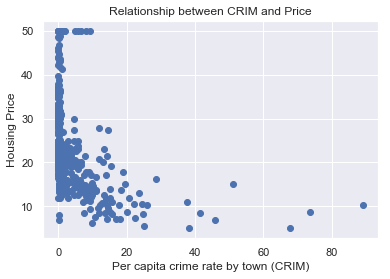

In [81]:
import seaborn as sns
sns.set()

plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

There is a negative relationship between housing price and crime, which makes sense. Homes in places where there is high crime rate will be less valuable. The majority of homes in the dataset are in an area with low/close to zero crime rates. Even in areas with no crime, home prices can fluctuate from being very expensive to not expensive. However, in the areas with highest crime rate, you will not see expensive homes. There are some outliers that don't follow the pattern, such as the very high end homes whose prices don't seem to be affected by crime rates of around 10 per capita.

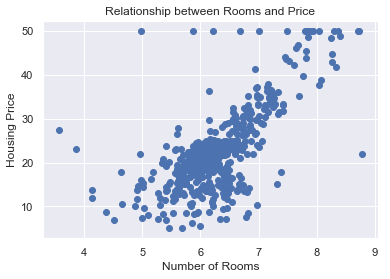

In [82]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")

There is a strong positive relationship between number of rooms and housing prices. The more rooms in a house, the more expensive. However, there are some outlier points that lie outside the trend.

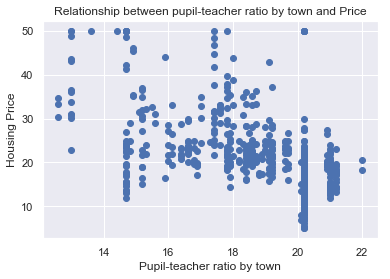

In [83]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between pupil-teacher ratio by town and Price")

There is a weak negative relationship between pupil-teacher ratio by town and housing price. The more students there are in a class, the less expensive the house. This is because pupil-teacher ratio reflects the quality of the school, and houses in good school districts are sought after and more expensive as a result.

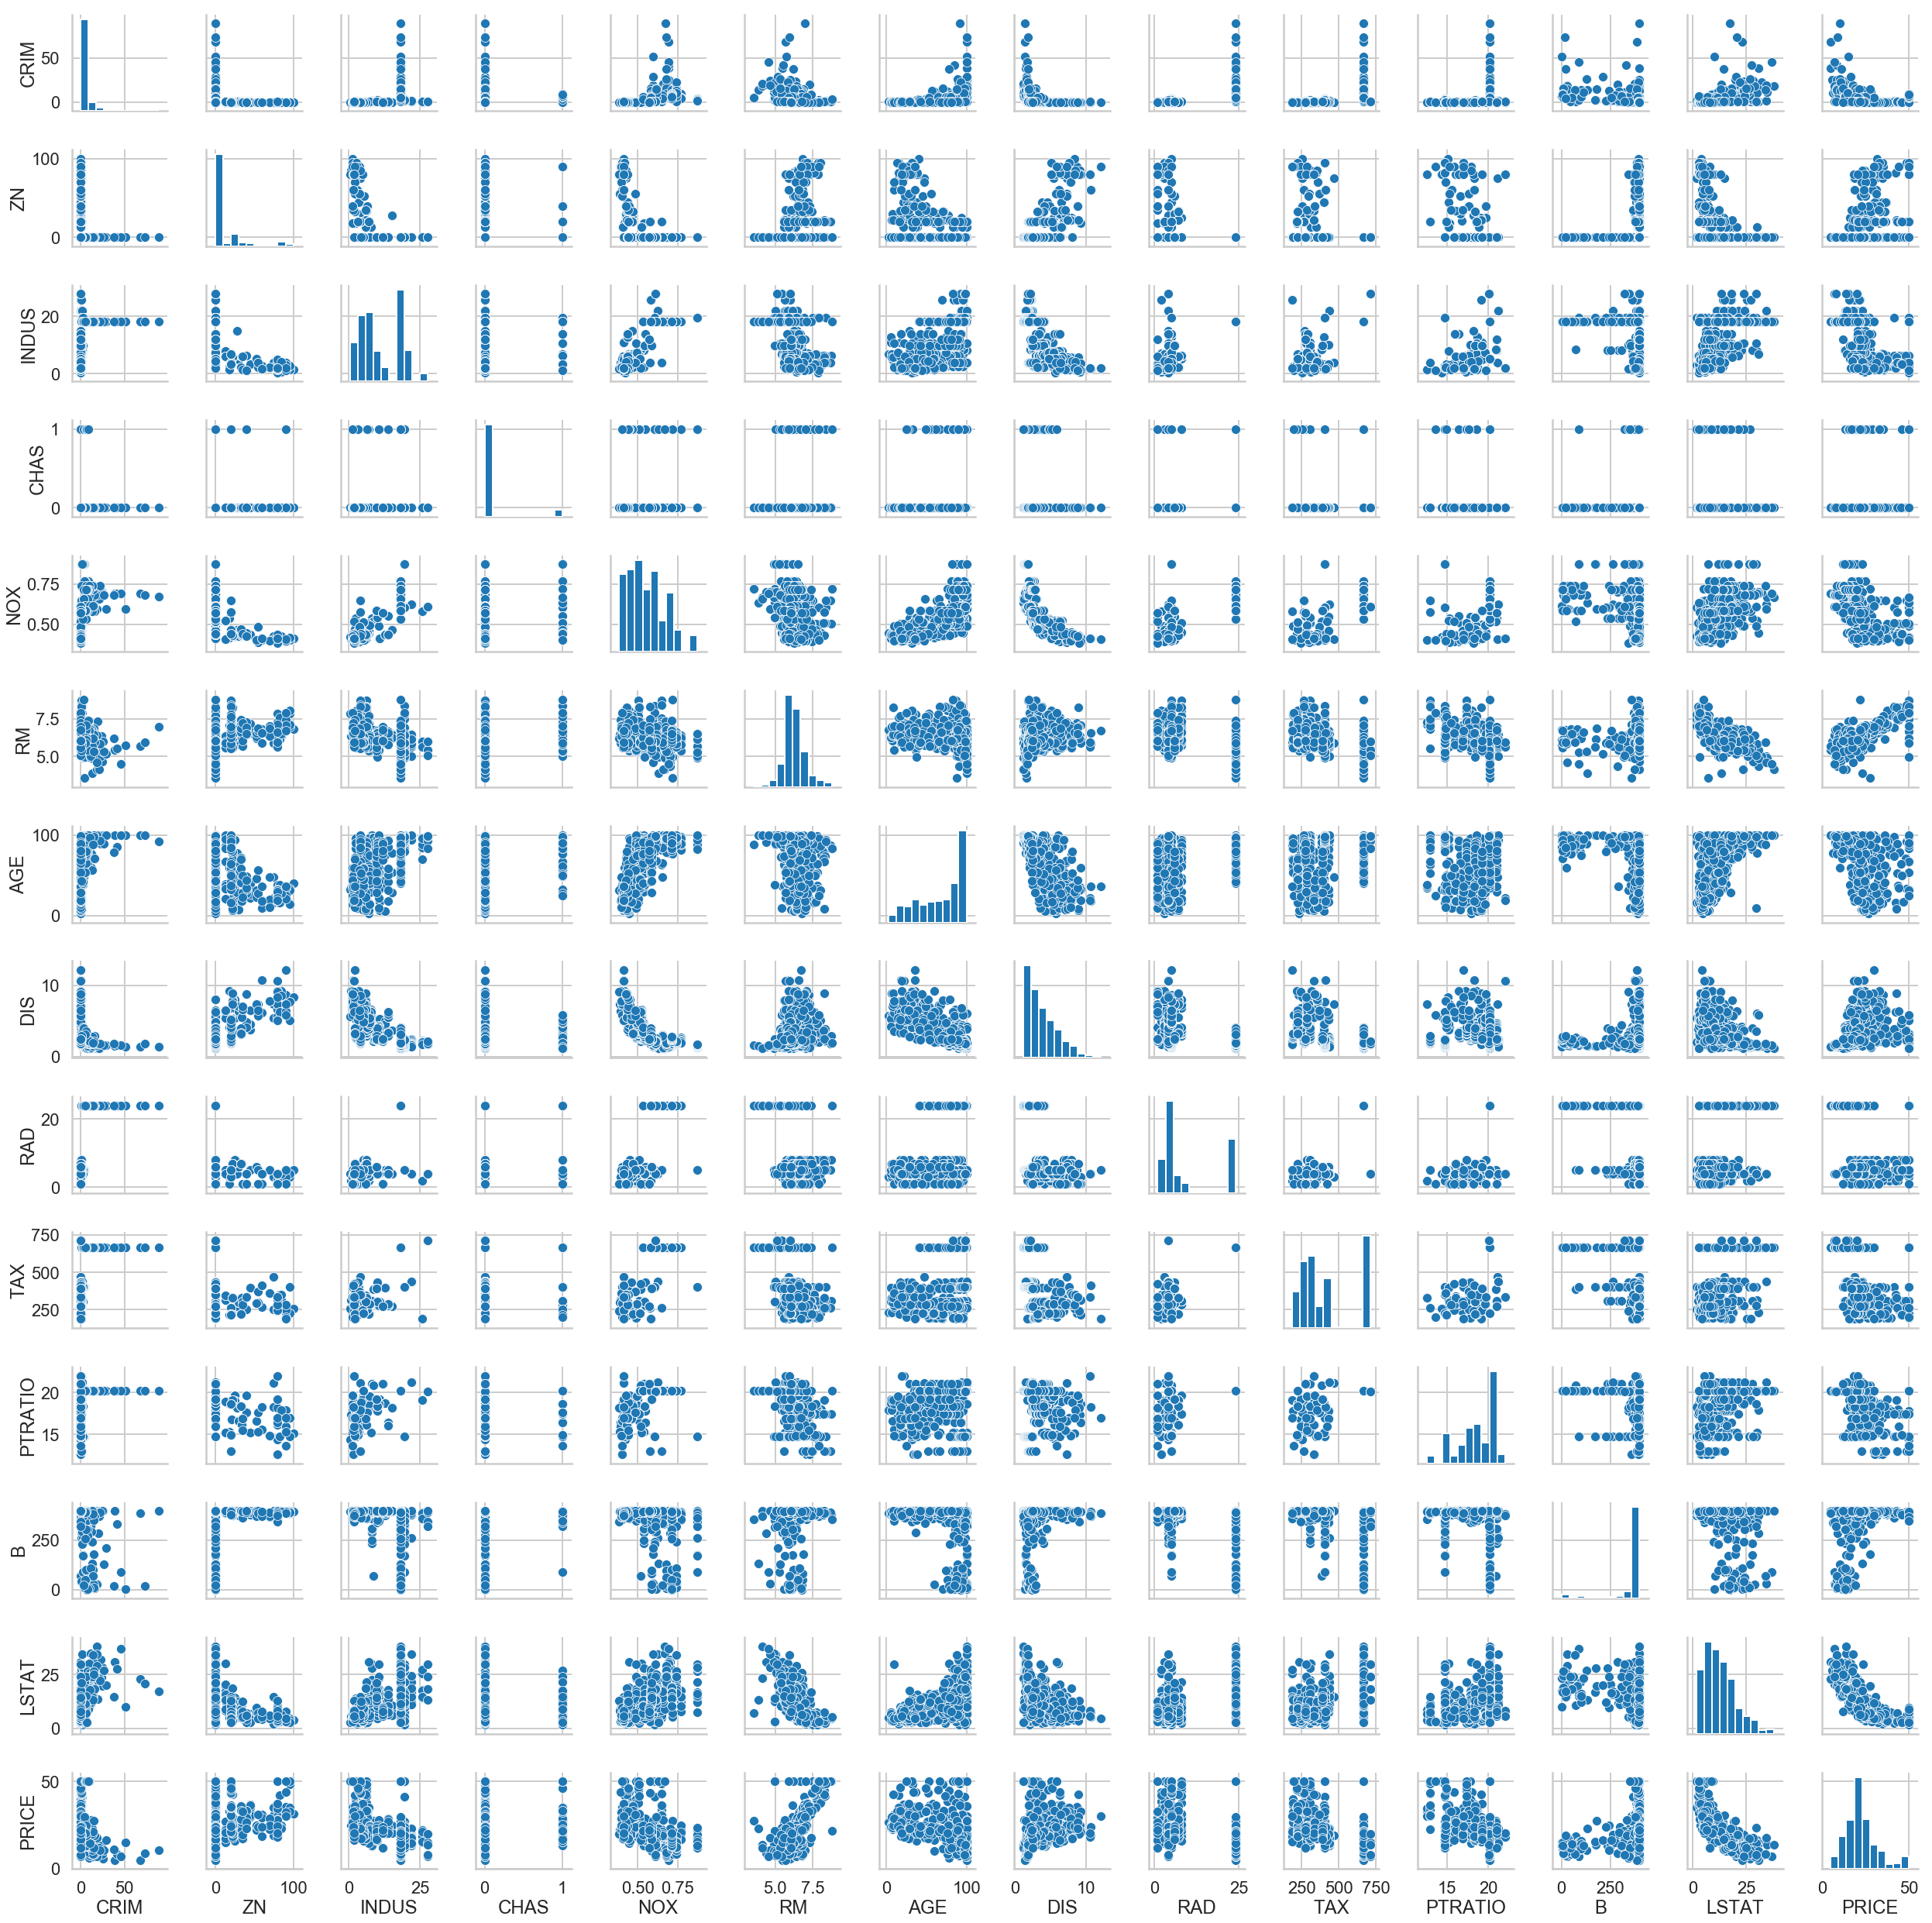

In [15]:
# your turn: create some other scatter plots
sns.pairplot(bos)

I visualize all the relationships between features. I'm mainly interested in features that impact housing price (rightmost column). However, it's also interesting to note other features that are correlated with one another, such as distance from the city (DIS) and nitric oxides concentration (NOX). When modeling, we don't want to use both features if they are are highly correlated.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

Homes are less valuable in places with too much non-retail space, with some outliers.


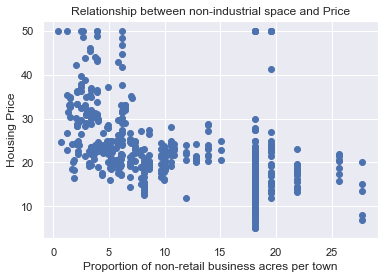

In [84]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Housing Price")
plt.title("Relationship between non-industrial space and Price")

print('Homes are less valuable in places with too much non-retail space, with some outliers.')

There is a strong negative correlation between % low status population and home price.
Poor people cannot afford to purchase expensive homes.


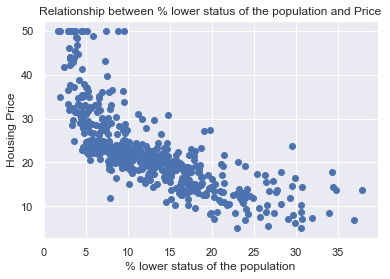

In [85]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between % lower status of the population and Price")

print('There is a strong negative correlation between % low status population and home price.')
print('Poor people cannot afford to purchase expensive homes.')

There is probably more pollution in industrial areas where employment centers are located.


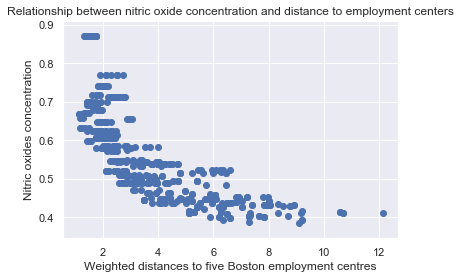

In [86]:
plt.scatter(bos.DIS, bos.NOX)
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Nitric oxides concentration")
plt.title("Relationship between nitric oxide concentration and distance to employment centers")

print('There is probably more pollution in industrial areas where employment centers are located.')

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/Users/julieshih/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


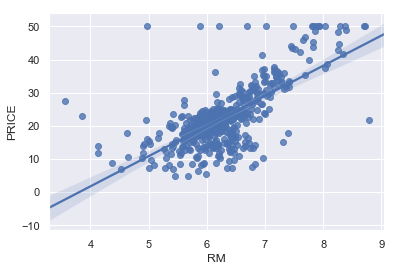

In [87]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


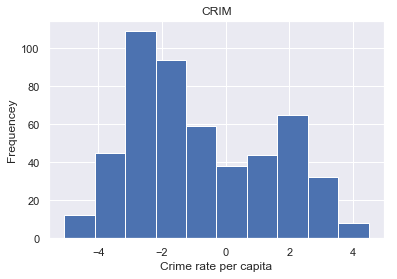

In [88]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

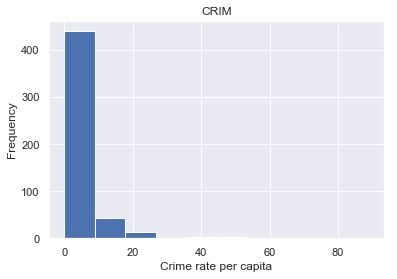

In [89]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Without taking the log of crime rate, most of the data points fall in areas with low crime and is bucketed into a single bar in the graph. By taking the log, extreme values don't drag out the tail of the graph so much and you can better see how crime rates are distributed.

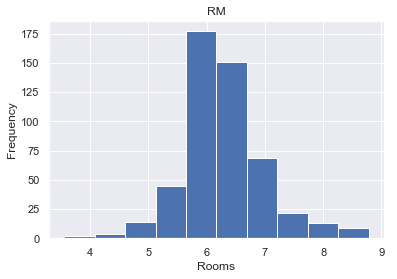

In [90]:
#your turn
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Rooms")
plt.ylabel("Frequency")
plt.show()

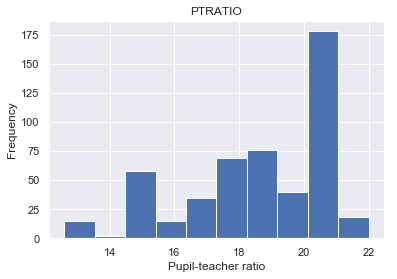

In [91]:
#your turn
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio")
plt.ylabel("Frequency")
plt.show()


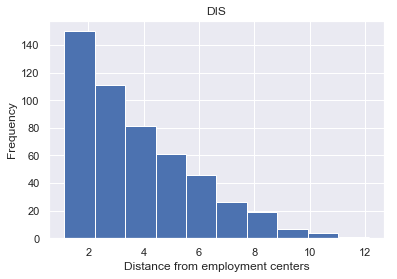

In [92]:
#your turn
plt.hist(bos.DIS)
plt.title("DIS")
plt.xlabel("Distance from employment centers")
plt.ylabel("Frequency")
plt.show()


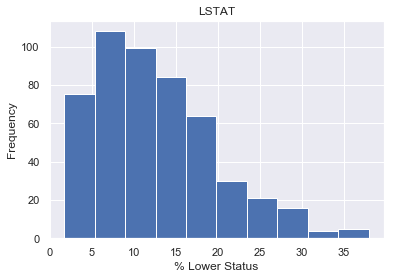

In [93]:
#your turn
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% Lower Status")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from pandas.core import datetools

/Users/julieshih/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.


In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        11:42:58   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

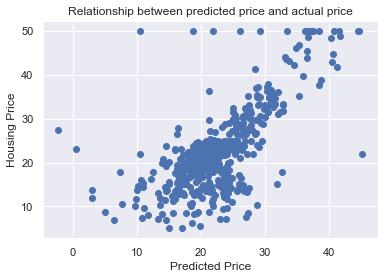

In [94]:
# your turn

plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Housing Price")
plt.title("Relationship between predicted price and actual price")


Generally the model is able to predict housing price close to the actual prices. In a perfect prediction, all data points would lie on a single line with slope of 1 and intercept of 0. There are some outliers where the model doesn't predict accurately at all.

### Fitting Linear Regression using `sklearn`


In [29]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [30]:
# Look inside lm object
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [31]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)
lm.coef_
pred_coef = zip(boston.feature_names,lm.coef_)
for feature, coef in pred_coef:
    print(feature,"|" , coef)

print('Intercept |',lm.intercept_)

CRIM | -0.10717055656035455
ZN | 0.04639521952979672
INDUS | 0.02086023953217453
CHAS | 2.688561399317897
NOX | -17.795758660309108
RM | 3.804752460258018
AGE | 0.0007510617033165828
DIS | -1.475758796519821
RAD | 0.30565503833909824
TAX | -0.012329346305270049
PTRATIO | -0.9534635546905593
B | 0.009392512722188249
LSTAT | -0.5254666329007875
Intercept | 36.49110328036188


/Users/julieshih/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [32]:
# don't fit an intercept term
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)
lm2.coef_
pred_coef = zip(boston.feature_names,lm2.coef_)
for feature, coef in pred_coef:
    print(feature, "|", coef)



CRIM | -0.09162978431218663
ZN | 0.04867512034092461
INDUS | -0.0037793000553351663
CHAS | 2.856367511604267
NOX | -2.880779326320901
RM | 5.925214318082785
AGE | -0.0072244792886902165
DIS | -0.9679952398388878
RAD | 0.17044339286754906
TAX | -0.009389253732673852
PTRATIO | -0.3924256795924845
B | 0.014983210248387968
LSTAT | -0.41697262352837355


**How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?**

In some cases, it makes sense to remove the intercept term if you want to force the model to go through the origin. For example, if you are predicting something's weight by materials used, it makes sense for weight to be 0 when there are no materials used.

Keeping the intercept will usually lead to better fit. If you remove the intercept, the other estimates become biased as they are forced to accomodate the origin. 

In a linear regression model, the intercept represents the value that would be predicted for the dependent variable if all the independent variables were simultaneously equal to zero. For this model on home prices, the intercept term should be kept because it doesn't make sense to force the model to go through the origin (e.g., a home would still have value regardless of its distance from economic centers or oxide levels).

**Is it enough that the residuals are normally distributed?**

The variables also must be independent. This means that the probability of the nth variable occurring will not be affected by the variables that occurred before it, different from a Markov sequence.

**T/F. To use linear regression,  Y must be normally distributed.**

False. If you use least squares estimation of your model, the underlying assumption is that the distribution of the **residuals** are normally distributed. The Y variable doesn't have to be normally distributed. There are no assumptions made about the distributions of the dependent or response variables in a least squares model.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [33]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036188


In [34]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [35]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [36]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

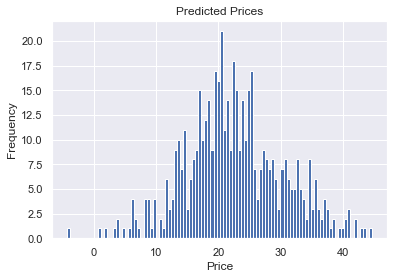

In [95]:
# your turn

pred = lm.predict(X)
plt.hist(pred, bins=100)
plt.title("Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [38]:
print('R^2 score:',lm.score(X,bos.PRICE))

R^2 score: 0.7406077428649428


In [39]:
# look at original distribution of prices
bos.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

The price predictions look normally distributed with a mean of around 20 thousand, which is similar to the mean of the original prices. The maximum is around 50-60 thousand, which also corresponds to the original price. The model has predicted one or two houses with negative value. These outliers should be ignored since it's impossible for a home to have negative price.

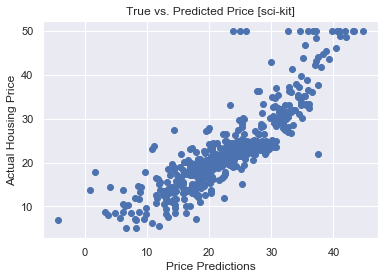

In [96]:
plt.scatter(pred, bos.PRICE)
plt.xlabel("Price Predictions")
plt.ylabel("Actual Housing Price")
plt.title("True vs. Predicted Price [sci-kit]")

sci-kit R^2: 0.7406077428649428
statsmodel R^2: 0.734586009138644


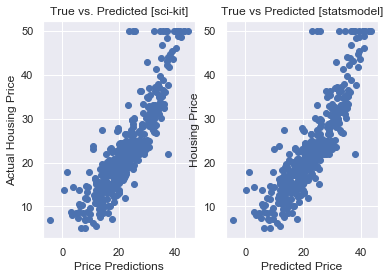

In [97]:
#Look at the two models side by side

plt.subplot(1, 2, 1)

plt.scatter(pred, bos.PRICE)
plt.xlabel("Price Predictions")
plt.ylabel("Actual Housing Price")
plt.title("True vs. Predicted [sci-kit]")

m2 = ols('PRICE ~ RM + CRIM + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
plt.subplot(1, 2, 2)
plt.scatter(m2.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Housing Price")
plt.title("True vs Predicted [statsmodel]")

print('sci-kit R^2:',lm.score(X,bos.PRICE))
print('statsmodel R^2:', m2.rsquared)

**What are the advantages and disadvantages of the sci-kit learn and statsmodel packages based on your exploration? What advantage does statsmodels provide?**

The advantage of the statsmodel package is that it allows you to easily drop and add dependent variables into the model, whereas in the sci-kit learn model you pass your predictors in as a dataframe and have to drop columns from the dataframe in order to change the model. The statsmodel also returns more in-depth diagnostic values like p-values, confidence intervals, and standard error along with R<sup>2,</sup> whereas the sci-kit learn model only returns the R<sup>2</sup> value.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [42]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [43]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31636.019130869743


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K-1$ and $K$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

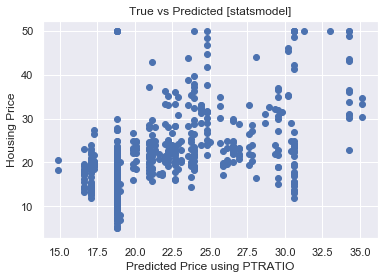

In [98]:
# your turn
m3 = ols('PRICE ~ PTRATIO',bos).fit()
plt.scatter(m3.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price using PTRATIO")
plt.ylabel("Housing Price")
plt.title("True vs Predicted [statsmodel]")

In [45]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           1.61e-34
Time:                        11:43:02   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value tells us that PTRATIO is a significant predictor of housing price. The coefficient of PTRATIO is -2.16, which means that as the pupil-teacher ratio increases by 1, the housing price decreases about \$2,160, with a confidence interval of between \$1,837 and \$2,477 dollars of decrease. An intercept of 62 means that when PTRATIO is 0, we can still expect the housing value to be around \$62,000.

In [46]:
print('statsmodel R^2:', m3.rsquared)

statsmodel R^2: 0.257847318009223


The R<sup>2</sup> value is 0.25, which means that the model explains 25% of the variance in home prices. The max R<sup>2</sup> value is 1, so the R<sup>2</sup> for this model is quite low and the PTRATIO not a great predictor.

Relevant formulas:

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

In [47]:
#Compute the  F-statistic. 

#K is the number of variables
#N is the number of observations

K = 1
N = bos.shape[0]
R2 = m3.rsquared
F = (R2/(1 - R2))*((N-K-1)/K)

print('F statistic:',F)

F statistic: 175.10554287569548


In [48]:
#Try computing the F-statistic using MSR/MSE

ESS = np.sum((m3.fittedvalues - np.mean(bos.PRICE)) **2 )
RSS = np.sum( (bos.PRICE - m3.fittedvalues ) **2  )

MSR = ESS/K               # explained (between) group variability
MSE = RSS/(N-K-1)         # unexplained (within) group variability

F = MSR/MSE
print('F statistic:',F)

F statistic: 175.10554287569582


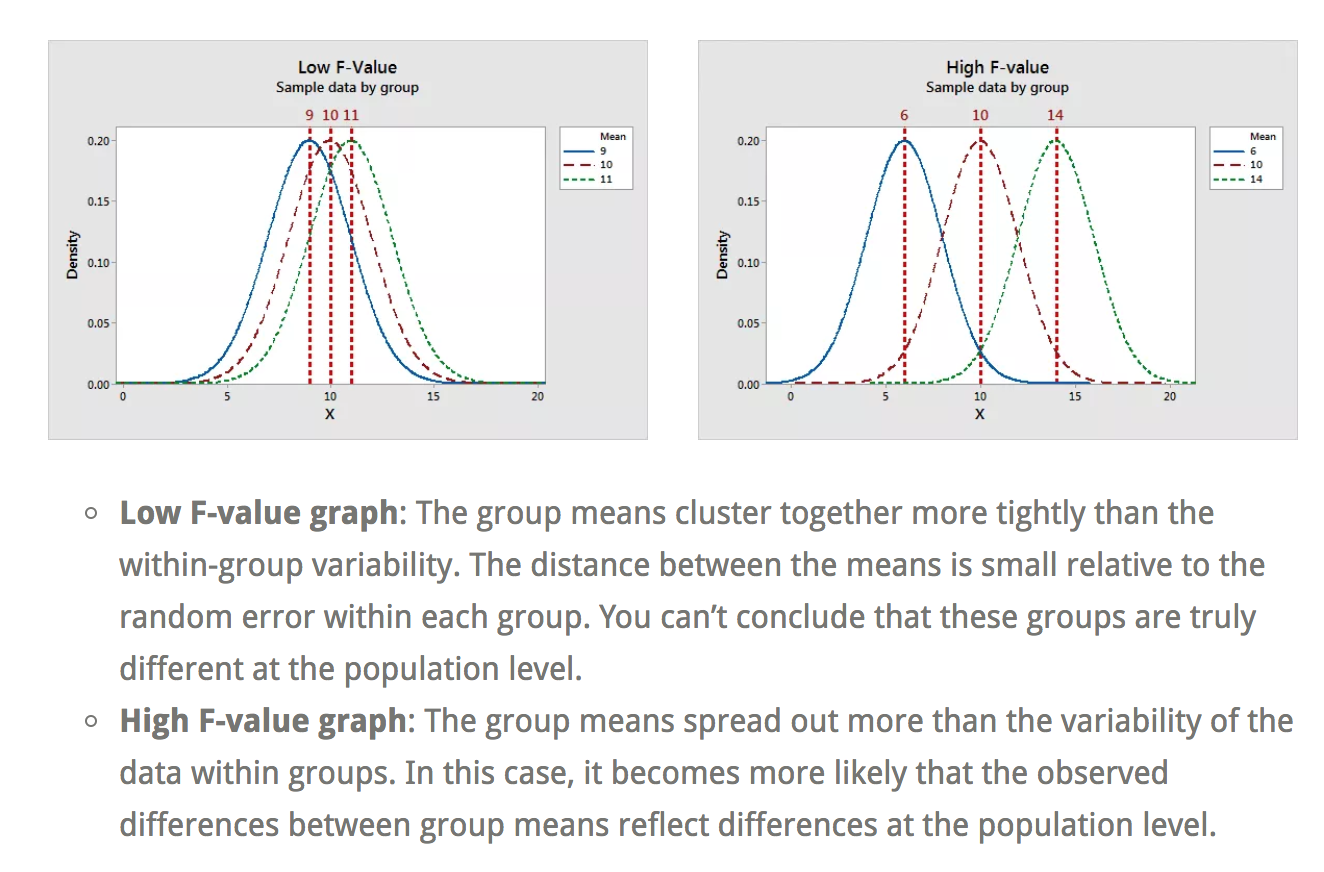

In [49]:
from IPython.display import Image
Image(filename='/Users/julieshih/workspace/aic-projects-public/unit-8-linear-regression/images/fvalue.png')

Source: https://statisticsbyjim.com/anova/f-tests-anova/

The high F value of this model indicates that the dependent variables as a group are having a significant impact on the predicted housing price, and that the difference is not just due to the variance within-groups. To conclude that the group means are not equal, you want low within-group variance (random error). As the number of variables in a model increases, if the distribution of the variables have high variance, it increases the chance that the difference observed is due to random error.

In [50]:
print('P-value of f-statistic:', m3.f_pvalue)
print('P-value of t-statistic [PTRATIO]:', m3.pvalues[1])
print('\n')
print('T-statistic:,',m3.tvalues[1])
print('F-statistic:,',m3.fvalue)

P-value of f-statistic: 1.609509478473047e-34
P-value of t-statistic [PTRATIO]: 1.609509478472424e-34


T-statistic:, -13.232745099777903
F-statistic:, 175.10554287569545


Observations:

* The p-value of the f and t statistics are the same. 
* The F-statistic is equal to t<sup>2</sup>. In this model,  (-13.23)<sup>2</sup> = 175.106

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

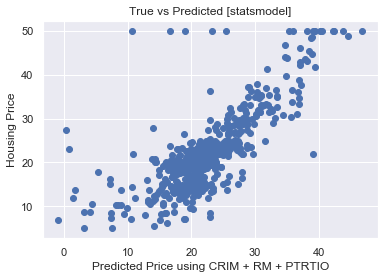

In [99]:
# your turn
m4 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
plt.scatter(m4.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price using CRIM + RM + PTRTIO")
plt.ylabel("Housing Price")
plt.title("True vs Predicted [statsmodel]")

In [52]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           1.09e-97
Time:                        11:43:02   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print('R2:',m4.rsquared_adj)
print('F-value:',m4.fvalue)

R2: 0.5909843592279231
F-value: 244.22387023858747


The F-statistic is 244 and has a significant p-value. This tells me that the model overall is statistically significant. In other words, the features as a whole are having an impact on predicting home price. The F-statistic is an indicator of whether the linear regression model provides a better fit to the data than a model without any dependent variables.

The R<sup>2</sup> value is 0.593. This tells me that about 59% of the variance in housing price is explained by the model. It's higher than the R<sup>2</sup> value of the previous model, which means that adding the extra dependent variables improved the model.

All 3 dependent variables are significant predictors of housing price with p-values of < 0.05. Looking at the coefficients, we can say that increased crime and greater pupil-teacher ratio leads to lower housing prices, whereas more rooms lead to greater housing prices.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

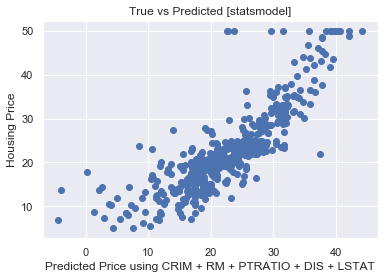

In [100]:
# your turn
m5 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT',bos).fit()
plt.scatter(m5.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price using CRIM + RM + PTRATIO + DIS + LSTAT")
plt.ylabel("Housing Price")
plt.title("True vs Predicted [statsmodel]")

In [55]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sun, 14 Apr 2019   Prob (F-statistic):          1.25e-126
Time:                        11:43:02   Log-Likelihood:                -1539.3
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9708      4.079      5.632      0.000      14.957      30.984
CRIM          -0.0903      0.031     -2.953      0.003      -0.150      -0.030
RM             4.3254      0.422     10.250      0.000       3.496       5.154
PTRATIO       -0.9227      0.116     -7.925      0.000      -1.151      -0.694
DIS           -0.6192      0.128     -4.836      0.000      -0.871      -0.368
LSTAT         -0.6258      0.048    -12.956      0.000      -0.721      -0.531
==============================================================================
Omnibus:                      182.217   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.152
Skew:                           1.559   Prob(JB):                    8.84e-176
Kurtosis:                       8.340   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next I calculate the f-statistic to see if the new model has a significantly different group mean. Use the formula:

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

In [56]:
old_RSS = np.sum( (bos.PRICE - m4.fittedvalues ) **2  )
new_RSS = np.sum( (bos.PRICE - m5.fittedvalues ) **2  )

old_DF = (N - 3 - 1)
new_DF = (N - 5 - 1)

F = (old_RSS - new_RSS) / (old_DF - new_DF) / (new_RSS / new_DF)
print('F-statistic:',F)

F-statistic: 83.941495665951


In [57]:
print('Compare AIC of prev model (',m4.aic,') with current model (', m5.aic,')')
print('Compare Adjusted R2 of prev model (',m4.rsquared_adj,') with current model (', m5.rsquared_adj,')')

Compare AIC of prev model ( 3233.100274457004 ) with current model ( 3090.610796526991 )
Compare Adjusted R2 of prev model ( 0.5909843592279231 ) with current model ( 0.6925721206672462 )


Both terms I added (DIS and LSTAT) were significant predictors of housing price. DIS and LSTAT are negatively correlated with price, meaning that the farther the house is from an employment center and the greater the portion of low income people, the lower the home value, which makes intuitive sense.

The AIC of the current model is lower than the AIC of the previous model, meaning that the current model is a better fit. This is also supported by the higher Adjusted R<sup>2</sup> value of the current model. The F-statistic is 83.9 which is still high, meaning there is a significant difference between the group means of the old model and the new model which shows that adding the variables improved the model.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

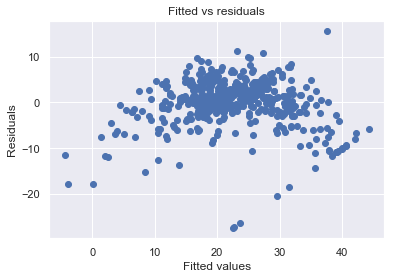

In [101]:
# Exercise: Construct a fitted values versus residuals plot. 
# What does the plot tell you? Are there any violations of the model assumptions?

plt.scatter(m5.fittedvalues, (m5.fittedvalues-bos.PRICE,))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Fitted vs residuals")

Heteroskedasticity is observed in the fan shape of the Residuals vs. Fitted plot. This means that the errors are not normally distributed and violates the assumption of **Normal distribution for errors**. If the errors were normally distributed, the graph of fitted vs. residuals would look evenly spaced out at every value across the horizontal axis.

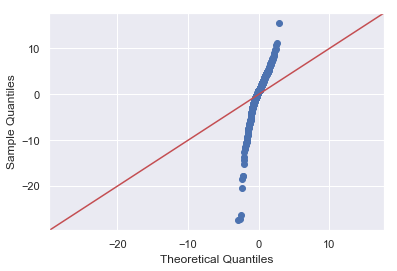

In [102]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
sm.qqplot(m5.fittedvalues-bos.PRICE, line='45')
plt.show()

The qqplot tells me that the errors are not normally distributed, or else they would lie on the 45 degree line. This violates the **Normal distribution for errors** assumption. Both the qqplot and the fitted vs. residuals plot tell me that the variance at low and high ends of housing prices is not well accounted for by the model.

In [60]:
# Exercise: What are some advantages and disadvantages of the fitted vs. residual 
# and quantile plot compared to each other?

The fitted vs. residual plot can tell you the direction that your variance is predicting wrong in. For example, at the low end of housing price the residuals are mostly negative, telling us the model predicts low-end homes too high. This information is not visible in the qqplot. 

The qqplot can tell you about the shape of your data. In this case, because the slope of the residual values is so steep, it means the data is heavy-tailed and have larger values than what we would expect.

In [61]:
# Exercise: Identify any outliers (if any) in your model 
# and write a story describing what these outliers might represent.

In [62]:
# Calculate cook's distance

influence = m5.get_influence()
influence.summary_frame().head()

,dfb_Intercept,dfb_CRIM,dfb_RM,dfb_PTRATIO,dfb_DIS,dfb_LSTAT,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.089998,-0.013209,0.041707,0.085691,0.038068,0.065520,0.003109,-1.505010,0.008167,-0.136570,-1.506922,-0.136744
1,-0.005766,0.004318,0.003292,0.003605,-0.010425,0.006318,0.000276,-0.770219,0.002788,-0.040729,-0.769906,-0.040712
2,-0.011649,0.001426,0.016852,0.006467,0.001971,-0.011247,0.000277,0.526232,0.005967,0.040772,0.525851,0.040743
3,-0.015018,0.005179,0.011018,0.019268,0.015598,-0.018855,0.000441,0.592709,0.007476,0.051440,0.592324,0.051407
4,-0.061946,0.002150,0.057293,0.042837,0.048429,-0.002975,0.002160,1.312037,0.007474,0.113853,1.312986,0.113935


In [63]:

cutoff = 4/N #set cook's dist. cutoff
cutoff

0.007905138339920948

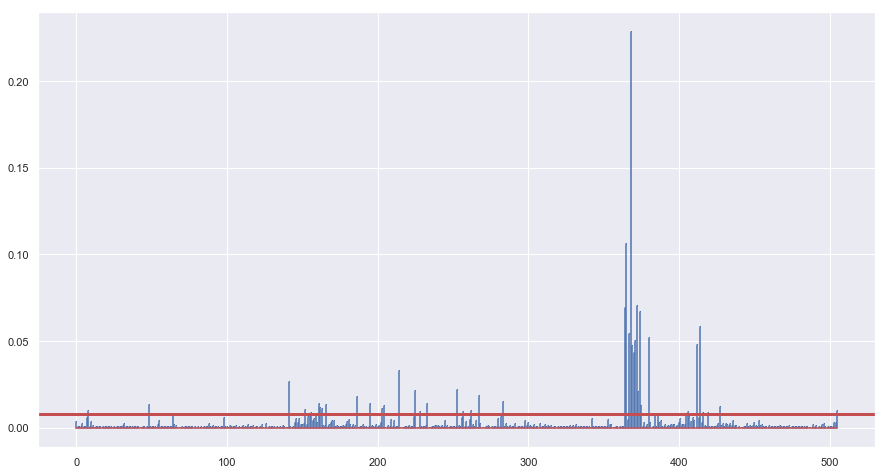

In [127]:
# all values above the red line are outliers

fig = plt.gcf()
fig.set_size_inches(15, 8)

(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.axhline(y = cutoff, linewidth=3, color='r')

All values above the red line are outliers according to cook's distance. These outlier values are homes that don't follow the general trends. For example, a home with few rooms that is worth a lot and a home with lots of rooms being worth little as we saw in the earlier scatterplots.

In [65]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. 
# Write a story explaining possible reasons for the high leverage points.

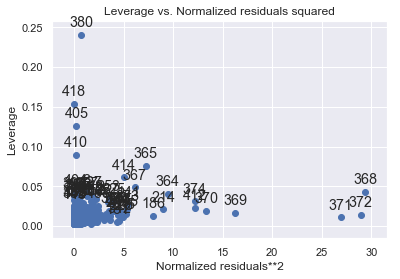

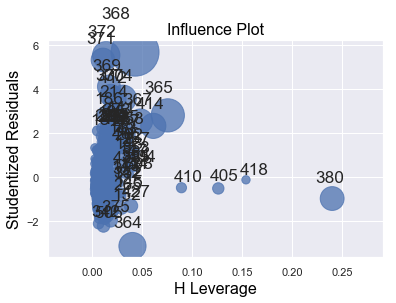

In [129]:
from statsmodels.graphics.regressionplots import *

plot_leverage_resid2(m5)
influence_plot(m5)
plt.show() 

Certain rows in the dataframe have a large influence on causing the errors observed in the model. These are likely outlier data. I will take the largest rows and examine them. I will also look at the summary stats of the Boston data to check what might be the unusual variable.

In [67]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per \$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [68]:
bos.iloc[368]

CRIM         4.89822
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.63100
RM           4.97000
AGE        100.00000
DIS          1.33250
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          375.52000
LSTAT        3.26000
PRICE       50.00000
Name: 368, dtype: float64

Row 368 is a really expensive house that has a less than average amount of rooms and a larger than average pupil-teacher ratio, features that are generally associated with less expensive homes.

In [69]:
bos.iloc[380]

CRIM        88.9762
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6710
RM           6.9680
AGE         91.9000
DIS          1.4165
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       17.2100
PRICE       10.4000
Name: 380, dtype: float64

Row 380 is a really cheap house that has more than the average amount of rooms, is close to employment centers and has a high percentage of industry, features that are generally associated with expensive homes.

In [70]:
bos.iloc[365]

CRIM         4.55587
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.71800
RM           3.56100
AGE         87.90000
DIS          1.61320
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          354.70000
LSTAT        7.12000
PRICE       27.50000
Name: 365, dtype: float64

Row 365 is a decently priced house that has very few rooms for its price.

In [71]:
# Exercise: Remove the outliers and high leverage points from your model and run the regression again. 
#How do the results change?

# make a new cook's distance column with extreme values masked
inf_df = influence.summary_frame()
s = inf_df.cooks_d
s.mask(s > cutoff)

bos2 = bos
bos2['cooks'] = s.mask(s > cutoff)
bos2.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,cooks
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.003109
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000276
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000277
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000441
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.002160
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.000184
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0.000042
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.005768
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,NaN
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0.000157


In [72]:
# Remove high leverage points: rows 380,365,368,364,372,371,418,405,374
bos2.iloc[418] 

CRIM        73.534100
ZN           0.000000
INDUS       18.100000
CHAS         0.000000
NOX          0.679000
RM           5.957000
AGE        100.000000
DIS          1.802600
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B           16.450000
LSTAT       20.620000
PRICE        8.800000
cooks        0.000565
Name: 418, dtype: float64

After examination, only points 418 and 405 need to be removed. The other points have already been masked by cook's distance.

In [73]:
bos2 = bos2.drop([418, 405]) 

In [74]:
bos2 = bos2[bos2.cooks.isnull() == False]
bos2.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,cooks
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.003109
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000276
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000277
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000441
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.002160
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0.000184
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0.000042
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0.005768
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0.000157
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,0.003406


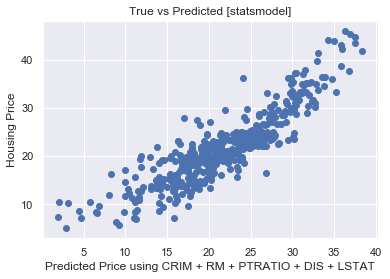

In [105]:
# fit the m5 model again
m5_v2 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT',bos2).fit()
plt.scatter(m5_v2.fittedvalues, bos2.PRICE)
plt.xlabel("Predicted Price using CRIM + RM + PTRATIO + DIS + LSTAT")
plt.ylabel("Housing Price")
plt.title("True vs Predicted [statsmodel]")

In [76]:
m5_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     331.8
Date:                Sun, 14 Apr 2019   Prob (F-statistic):          2.12e-149
Time:                        11:43:07   Log-Likelihood:                -1222.2
No. Observations:                 462   AIC:                             2456.
Df Residuals:                     456   BIC:                             2481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0528      3.272      4.295      0.000       7.623      20.482
CRIM          -0.1322      0.033     -3.950      0.000      -0.198      -0.066
RM             4.8656      0.371     13.109      0.000       4.136       5.595
PTRATIO       -0.7845      0.084     -9.387      0.000      -0.949      -0.620
DIS           -0.3042      0.094     -3.225      0.001      -0.490      -0.119
LSTAT         -0.5351      0.040    -13.417      0.000      -0.613      -0.457
==============================================================================
Omnibus:                       21.496   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.875
Skew:                           0.489   Prob(JB):                     6.54e-06
Kurtosis:                       3.532   Cond. No.                         498.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

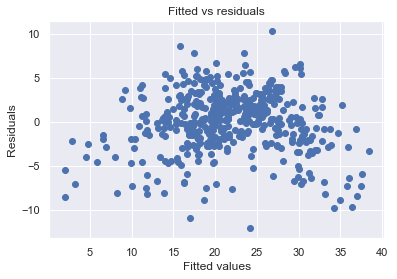

In [106]:
# Exercise: Construct a fitted values versus residuals plot. 
# What does the plot tell you? Are there any violations of the model assumptions?

plt.scatter(m5_v2.fittedvalues, (m5_v2.fittedvalues-bos2.PRICE,))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Fitted vs residuals")

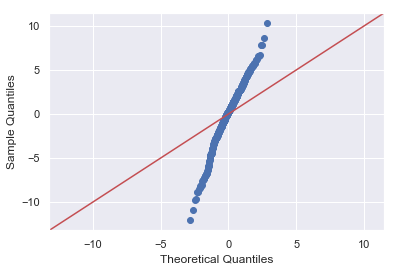

In [107]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
sm.qqplot(m5_v2.fittedvalues-bos2.PRICE, line='45')
plt.show()

The fitted vs. residuals and qqplot and graphs improved slightly, although the errors still aren't normally distributed. This could be due to needing more variables in the model in order to capture the housing price. The current model uses only 5 of the variables.

In [113]:
# to get a better model, I use RFECV to select my features

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

X = bos.iloc[0:,0:-2]
selector = RFECV(estimator=SVR(kernel="linear"), cv=10, scoring='neg_mean_squared_error')
selector.fit(X, bos.PRICE)
print("Optimal no. of features: %d" % selector.n_features_)

Optimal no. of features: 6


/Users/julieshih/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [114]:
# print which features to use 
X.columns[selector.support_]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [115]:
# Calculate VIF of each selected feature to make sure there's no multicollinearlity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = bos2[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/Users/julieshih/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      512.778300
CHAS         1.025011
NOX          2.996542
RM           1.661636
DIS          2.506190
PTRATIO      1.210739
LSTAT        2.712874
dtype: float64

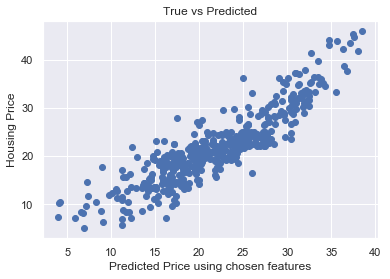

In [119]:
# make a final model with new features

m6 = ols('PRICE ~ CHAS + NOX + RM + DIS + PTRATIO + LSTAT',bos2).fit()
plt.scatter(m6.fittedvalues, bos2.PRICE)
plt.xlabel("Predicted Price using chosen features")
plt.ylabel("Housing Price")
plt.title("True vs Predicted")

VIF is < 3, the selected variables are not correlated with other another.

In [120]:
from scipy import stats

xt, maxlog, interval = stats.boxcox(m6.fittedvalues, alpha=0.05)
print("lambda = {:g}".format(maxlog))

lambda = 0.921481


The lambda value is close to 1, so no transformation is needed.
* λ = 1.00: no transformation needed; produces results identical to original data
* λ = 0.50: square root transformation
* λ = 0.33: cube root transformation
* λ = 0.25: fourth root transformation
* λ = 0.00: natural log transformation
* λ = -0.50: reciprocal square root transformation
* λ = -1.00: reciprocal (inverse) transformation and so forth.

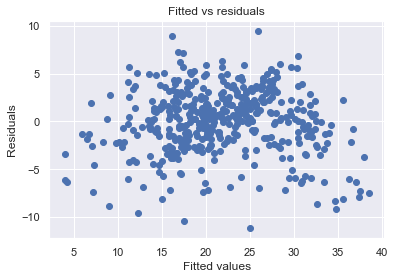

In [121]:
plt.scatter(m6.fittedvalues, (m6.fittedvalues-bos2.PRICE,))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Fitted vs residuals")

The residuals vs. fitted graph is improved.

In [122]:
#Final model summary
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sun, 14 Apr 2019   Prob (F-statistic):          2.40e-154
Time:                        11:51:29   Log-Likelihood:                -1207.6
No. Observations:                 462   AIC:                             2429.
Df Residuals:                     455   BIC:                             2458.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2472      3.507      7.200      0.000      18.356      32.138
CHAS           1.8863      0.668      2.822      0.005       0.573       3.200
NOX          -14.4762      2.329     -6.215      0.000     -19.054      -9.899
RM             4.6945      0.358     13.108      0.000       3.991       5.398
DIS           -0.6847      0.117     -5.858      0.000      -0.914      -0.455
PTRATIO       -0.8712      0.081    -10.719      0.000      -1.031      -0.711
LSTAT         -0.4999      0.039    -12.766      0.000      -0.577      -0.423
==============================================================================
Omnibus:                       18.238   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.562
Skew:                           0.456   Prob(JB):                     5.65e-05
Kurtosis:                       3.428   Cond. No.                         577.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""